#**Final results Models comparison**

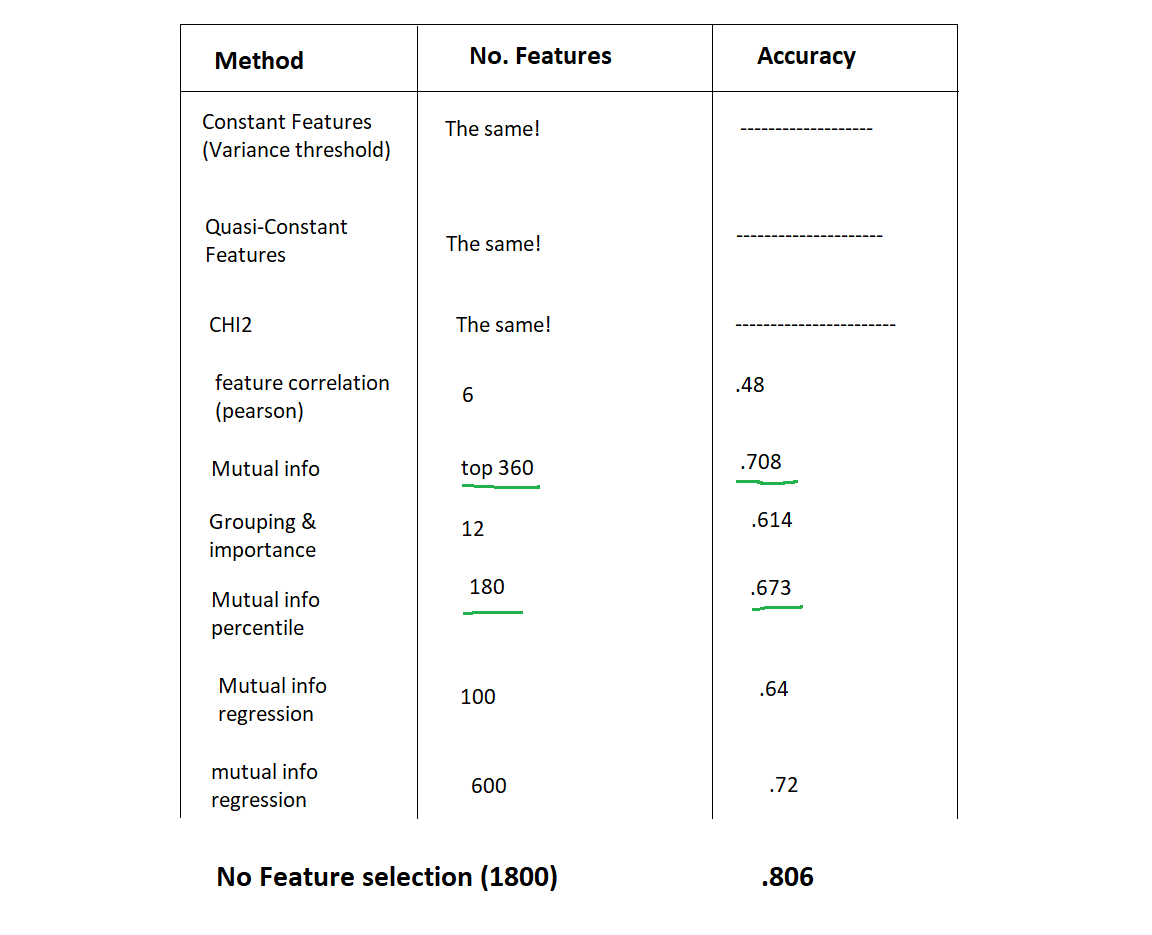

# importing libraries and dataset from kaggle

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [ ]:
! pip install kaggle


In [ ]:
! mkdir ~/.kaggle


In [ ]:
! cp //content/kaggle.json ~/.kaggle/


In [ ]:
! chmod 600 ~/.kaggle/kaggle.json


In [ ]:
! kaggle datasets download niloy333/kuhar

In [ ]:
! unzip kuhar.zip



In [ ]:
#Reading data:
df = pd.read_csv("/content/3.Time_domain_subsamples/KU-HAR_time_domain_subsamples_20750x300.csv",header=None)
dff = df.values
signals = dff[:, 0: 1800] #These are the time-domian subsamples (features) 
signals = np.array(signals, dtype=np.float32)
labels = dff[:, 1800] #These are their associated class labels (classes)

print(signals.shape)
print(labels.shape)

(20750, 1800)
(20750,)


In [ ]:
signals


array([[ 4.2305e-03, -2.8038e-04, -1.3906e-02, ..., -1.6680e-02,
        -1.6650e-02, -1.3097e-02],
       [ 1.2482e-02,  3.2496e-02,  6.7856e-02, ..., -1.0394e-02,
        -8.0698e-03, -4.3542e-03],
       [ 1.2127e-02,  2.8458e-02,  6.2075e-02, ..., -4.1902e-03,
         2.1465e-04,  8.4980e-04],
       ...,
       [ 1.2695e+00,  1.3122e+00,  7.2557e-01, ...,  1.7271e-01,
        -2.8937e-03,  2.3955e-02],
       [-5.5622e+00, -2.7970e+00, -2.3533e+00, ..., -1.3196e-01,
        -1.5078e-01, -1.8732e-01],
       [ 8.3810e-01, -1.2116e+00, -5.6718e-01, ...,  1.3448e-02,
         2.7566e-02,  1.4051e-01]], dtype=float32)

In [ ]:
S=df.loc[:,0:1799]
S.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1760,1761,1762,1763,1764,1765,1766,1767,1768,1769,1770,1771,1772,1773,1774,1775,1776,1777,1778,1779,1780,1781,1782,1783,1784,1785,1786,1787,1788,1789,1790,1791,1792,1793,1794,1795,1796,1797,1798,1799
20745,1.8716,1.6488,1.60890,1.80230,1.47500,1.390700,1.13780,1.28960,0.96375,1.022200,1.74060,0.94338,2.33520,0.270580,2.211300,5.260400,2.75680,-0.55682,0.030089,-1.0348,-3.91630,-0.428170,2.51850,0.012873,1.52750,0.79911,2.12170,2.156800,1.470100,2.870300,2.36800,-0.85092,-1.33580,0.35271,1.25510,0.443930,0.38259,1.30750,-0.70573,-1.12010,...,0.580470,0.542080,0.493850,0.393570,0.371170,0.249590,0.12527,0.099327,0.052213,0.034262,-0.012411,-0.032257,-0.084295,-0.126360,-0.105460,-0.063783,-0.048431,0.007495,0.035550,-0.129900,-0.308940,-0.376050,-0.528120,-0.564250,-0.52832,-0.480580,-0.441880,-0.37032,-0.371580,-0.398040,-0.410590,-0.480470,-0.53814,-0.49764,-0.43259,-0.414760,-0.363110,-0.329190,-0.460960,-0.621920
20746,1.8894,2.0227,0.81730,-0.50584,2.46220,3.814200,2.66100,2.65120,1.99140,4.427300,5.97110,3.24850,-1.14490,0.969250,-2.483300,-2.474500,-0.50089,-0.67807,-0.670580,1.3354,1.17150,0.858140,1.25750,2.007100,2.55880,1.94730,0.30066,0.207740,-0.014855,-0.711390,0.67138,1.77520,2.19880,-1.38070,-1.10590,-0.653960,-2.11740,-1.53350,1.36240,1.41820,...,1.096100,1.055700,1.103000,1.147400,1.155100,1.172700,1.16890,1.125200,1.098700,1.051600,0.934530,0.807510,0.716730,0.701160,0.542750,0.357710,0.310080,0.218620,0.190570,0.124570,0.095531,0.024546,-0.048593,-0.058614,-0.07886,-0.078623,-0.044195,-0.01908,0.004026,0.042637,0.016722,-0.075675,-0.10947,-0.20882,-0.28893,-0.320880,-0.379540,-0.408210,-0.507970,-0.548040
20747,1.2695,1.3122,0.72557,0.53129,0.95842,-0.049679,1.22310,1.83700,0.98974,1.882600,1.52290,0.93061,1.02760,1.982500,3.348100,2.227100,3.39150,2.86490,2.869600,2.6779,2.44240,3.064200,2.31990,3.609000,3.83440,2.19360,2.12850,1.561900,0.703020,0.823440,0.26217,-0.16012,0.25418,1.58430,0.97928,2.240200,2.59830,1.22350,0.64076,0.74475,...,0.023307,-0.037959,-0.277510,-0.371250,-0.345060,-0.330770,-0.21027,0.062868,0.132020,0.261250,0.325100,0.598000,0.898440,0.953460,1.062500,1.064600,0.832470,0.655370,0.760180,0.914940,1.002100,1.312000,1.446400,1.776700,2.09170,2.071300,2.026300,1.98560,1.765800,1.632900,1.550500,1.431600,1.38280,1.21850,1.12540,0.639470,0.277320,0.172710,-0.002894,0.023955
20748,-5.5622,-2.7970,-2.35330,-3.07560,-4.13610,-4.028800,-0.58026,0.34607,-2.63170,-2.790000,-2.86780,-2.99570,-3.37690,0.215840,0.698770,0.415250,-0.61255,-0.88968,-1.061200,-1.3126,-0.01512,0.089774,-0.24168,1.058800,0.90355,-0.79466,-1.52990,-0.024145,1.350500,-0.008132,0.94737,0.70096,0.32479,0.44440,0.52502,-0.048851,-0.02038,1.67740,0.96095,2.23280,...,-0.007757,0.025042,0.085200,0.061767,-0.037103,-0.072374,-0.21798,-0.356640,-0.338910,-0.314310,-0.302230,-0.229460,-0.190910,-0.244400,-0.302090,-0.336110,-0.437610,-0.464300,-0.420880,-0.389260,-0.366260,-0.323830,-0.326010,-0.346490,-0.35674,-0.423260,-0.477130,-0.50671,-0.564420,-0.573600,-0.573510,-0.572520,-0.43918,-0.24667,-0.20902,-0.128670,-0.104730,-0.131960,-0.150780,-0.187320
20749,0.8381,-1.2116,-0.56718,-0.55532,-0.64496,-0.232160,0.36707,-0.04070,0.18598,-0.009721,0.45146,0.58319,0.27811,0.081182,0.088696,0.005247,-0.76956,1.10330,1.791200,0.8767,0.90174,1.087300,-0.23316,-0.927400,-0.13343,0.90689,0.42443,-0.549070,-0.196810,-0.178550,-0.64507,-0.38725,0.34841,-0.12315,0.24493,0.004159,-0.14166,-0.25646,-0.21177,0.15912,...,0.088564,0.073222,0.068326,0.132570,0.196980,0.212090,0.24646,0.253720,0.248840,0.245950,0.214700,0.170780,0.132610,0.018233,-0.019218,-0.116120,-0.199030,-0.157660,-0.076229,-0.039824,0.071249,0.116760,0.167410,0.222620,0.21971,0.201280,0.202320,0.25659,0.297490,0.319670,0.367400,0.353460,0.29081,0.26162,0.11912,0.004095,0.006755,0.013448,0.027566,0.140510


In [ ]:
L=df.loc[:,1800]
L.tail()

20745    9
20746    9
20747    9
20748    9
20749    9
Name: 1800, dtype: int64

In [ ]:
dff.shape

(20750, 1803)

In [ ]:
fft = np.zeros(signals.shape, dtype=np.float32)
for i in range(0,len(signals)):
    for j in range(0, 6):
        tmp = np.fft.fft(signals[i, j*300:(j+1)*300])
        fft[i, j*300:(j+1)*300] = abs(tmp)
        
print(fft.shape)

(20750, 1800)


#Train test split

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(fft,labels, test_size=0.3, random_state=9, stratify=labels)
print(X_train.shape)
print(X_test.shape)

(14525, 1800)
(6225, 1800)


#Removing Constant features // NOTHING TO REMOVE

In [ ]:
S_train, S_test, L_train, L_test=train_test_split(S,L, test_size=0.3, random_state=9, stratify=labels)
print(S_train.shape)
print(S_test.shape)

(14525, 1800)
(6225, 1800)


In [ ]:
print(L_train.shape)
print(L_test.shape)

(14525,)
(6225,)


In [ ]:
L_train

5924     12
16033     5
929       0
15644     5
12785     4
         ..
11265     3
4151     10
15738     5
12446     3
1892      1
Name: 1800, Length: 14525, dtype: int64

using VarianceThreshold

In [ ]:
from sklearn.feature_selection import VarianceThreshold
constant_filter = VarianceThreshold(threshold=0)

#Fit and transforming on train data
data_constant = constant_filter.fit_transform(S_train)
print(data_constant.shape)

#Extracting all constant columns using get support function of our filter
constant_columns = [column for column in S_train.columns
                    if column not in S_train.columns[constant_filter.get_support()]]

#No. of constant columns
print(len(constant_columns))

#Constant columns names:
for column in constant_columns:
    print(column)

(14525, 1800)
0


In [ ]:
data_cons = df.drop(constant_columns,axis=1)
data_cons.shape

(20750, 1803)

#Constant Features Removal #2 // NOTHING TO REMOVE

In [ ]:
constant_filter = VarianceThreshold(threshold=0)
constant_filter.fit(S_train)

VarianceThreshold(threshold=0)

In [ ]:
constant_filter.get_support().sum()

1800

In [ ]:
constant_list = [not temp for temp in constant_filter.get_support()]

In [ ]:
X_train_filter = constant_filter.transform(S_train)
X_test_filter = constant_filter.transform(S_test)

In [ ]:
X_train_filter.shape, X_test_filter.shape, X_train.shape

((14525, 1800), (6225, 1800), (14525, 1800))

# Removing Quasi-Constant Features // NOTHING TO REMOVE

In [ ]:
qcons_filter = VarianceThreshold(threshold=0.01)

#Fit and transforming on train data
data_qcons = qcons_filter.fit_transform(S_train)
print(data_qcons.shape)

#Extracting all Quasi constant columns using get support function of our filter
qcons_columns = [column for column in S_train.columns
                    if column not in S_train.columns[qcons_filter.get_support()]]

#No. of Quasi constant columns
print(len(qcons_columns))

#Quasi Constant columns names:
for column in qcons_columns:
    print(column)

(14525, 1800)
0


In [ ]:
qcons_filter.get_support().sum()

1800

In [ ]:
X_train_quasi_filter = qcons_filter.transform(S_train)
X_test_quasi_filter = qcons_filter.transform(S_test)

In [ ]:
X_train_quasi_filter.shape, X_test_quasi_filter.shape

((14525, 1800), (6225, 1800))

In [ ]:
data_qcons = df.drop(qcons_columns,axis=1)
data_qcons.shape

(20750, 1803)

# CHI // NOTHING TO REMOVE

In [ ]:
from sklearn.feature_selection import chi2
f_p_values=chi2(X_train,y_train)

In [ ]:
f_p_values

(array([2.92065955e+10, 9.06499908e+08, 4.34973634e+08, ...,
        1.48150729e+08, 2.24856628e+08, 4.60773368e+08]),
 array([0., 0., 0., ..., 0., 0., 0.]))

In [ ]:
import pandas as pd
p_values=pd.Series(f_p_values[1])
p_values.index=S_train.columns
p_values

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
1795    0.0
1796    0.0
1797    0.0
1798    0.0
1799    0.0
Length: 1800, dtype: float64

In [ ]:
p_values.sort_index(ascending=False)


1799    0.0
1798    0.0
1797    0.0
1796    0.0
1795    0.0
       ... 
4       0.0
3       0.0
2       0.0
1       0.0
0       0.0
Length: 1800, dtype: float64

# Correlation with Other Variables (LEAVES 6 FEATURES)

To Identify input features that have **a low correlation with other independent variables**. Iterating through all the filtered input features based on step 1 and checking each input feature correlation with all other input features. We will keep input features that are not highly correlated with other input features(one of them is enough)

In [ ]:
for i in range(0,len(S.columns)):
    for j in  range(0,len(S.columns)):
        if i!=j:
            corr_1=np.abs(S[S.columns[i]].corr(S[S.columns[j]]))
            if corr_1 <0.3:
                print( S.columns[i] , " is not correlated  with ", S.columns[j])
            elif corr_1>0.75:
                print( S.columns[i] , " is highly  correlated  with ", S.columns[j])

Streaming output truncated to the last 5000 lines.
1794  is highly  correlated  with  694
1794  is highly  correlated  with  695
1794  is highly  correlated  with  696
1794  is highly  correlated  with  697
1794  is highly  correlated  with  698
1794  is highly  correlated  with  699
1794  is highly  correlated  with  700
1794  is highly  correlated  with  701
1794  is highly  correlated  with  702
1794  is highly  correlated  with  703
1794  is highly  correlated  with  704
1794  is highly  correlated  with  705
1794  is highly  correlated  with  706
1794  is highly  correlated  with  707
1794  is highly  correlated  with  708
1794  is highly  correlated  with  709
1794  is highly  correlated  with  710
1794  is highly  correlated  with  711
1794  is highly  correlated  with  712
1794  is highly  correlated  with  713
1794  is highly  correlated  with  714
1794  is highly  correlated  with  715
1794  is highly  correlated  with  716
1794  is highly  correlated  with  717
1794  is high

In [ ]:
S_train.corr()

In [ ]:
S_train.shape

(14525, 1800)

In [ ]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = S_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [ ]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [ ]:
corr_features = correlation(S_train, 0.95)
len(set(corr_features))

1794

In [ ]:
corr_features

{1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185

In [ ]:
FS_S_train=S_train.drop(corr_features,axis=1)
FS_S_test=S_test.drop(corr_features,axis=1)

In [ ]:
FS_S_train

,0,300,600,900,1200,1500
5924,-1.065600,0.197100,-1.159700,-0.299270,-0.057681,-0.331850
16033,0.013450,-0.000596,0.000864,0.007410,0.030026,-0.002893
929,0.015976,-0.001124,-0.017249,0.012238,-0.006762,0.005704
15644,0.015159,-0.005605,0.015929,0.000031,0.017410,0.001511
12785,2.741600,0.474540,-1.049600,0.392350,-0.678960,-0.413450
...,...,...,...,...,...,...
11265,-0.248890,-0.907660,-0.333840,1.129800,0.135300,0.133670
4151,-0.212690,0.153300,-0.477520,-0.009219,0.402980,0.096944
15738,-0.016038,0.061365,-0.037251,-0.007637,-0.016568,0.002017
12446,-0.221200,-0.522030,-1.760300,-1.192300,0.187070,0.150220


# testing model (features correlation with other vars>.95=.48) 

In [ ]:
# Classifying HAR samples:

lr_r = RandomForestClassifier(n_estimators=300, max_features='sqrt')
lr_r.fit(FS_S_train,  L_train)
accuracy_r = lr_r.score(FS_S_test, L_test)

In [ ]:
# Showing results:

print('Classification Accuracy: ',accuracy_r)
L_pred=lr_r.predict(FS_S_test)
print('\nConfusion Report: ') 
print(classification_report(L_test, L_pred))

Classification Accuracy:  0.4878714859437751

Confusion Report: 
              precision    recall  f1-score   support

           0       0.52      0.54      0.53       566
           1       0.56      0.70      0.62       562
           2       0.54      0.58      0.56       539
           3       0.50      0.69      0.58       560
           4       0.48      0.63      0.54       653
           5       0.64      0.51      0.56       544
           6       0.47      0.44      0.45       529
           7       0.31      0.27      0.29       400
           8       0.55      0.45      0.49       200
           9       0.51      0.28      0.37       144
          10       0.51      0.38      0.44       302
          11       0.36      0.38      0.37       265
          12       0.00      0.00      0.00        95
          13       0.25      0.06      0.10        78
          14       0.61      0.57      0.59       178
          15       0.27      0.26      0.26       239
          16    

#correlated features #2 =.48

In [ ]:
import seaborn as sns

In [ ]:
corrmat = S_train.corr()

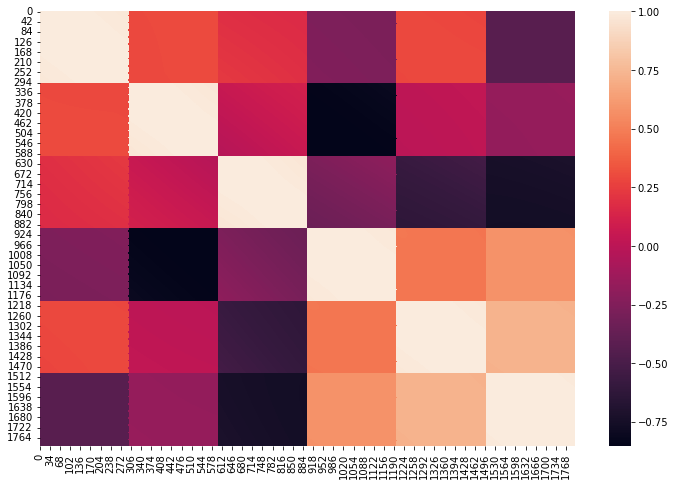

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(corrmat)

In [ ]:
def get_correlation(data, threshold):
    corr_col = set()
    corrmat = data.corr()
    for i in range(len(corrmat.columns)):
        for j in range(i):
            if abs(corrmat.iloc[i, j])> threshold:
                colname = corrmat.columns[i]
                corr_col.add(colname)
    return corr_col

In [ ]:
corr_features = get_correlation(S_train, 0.92)
corr_features

{1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185

In [ ]:
len(corr_features)

1794

In [ ]:
X_train_uncorr = S_train.drop(labels=corr_features, axis = 1)
X_test_uncorr = S_test.drop(labels = corr_features, axis = 1)

In [ ]:
X_train_uncorr.shape, X_test_uncorr.shape

((14525, 6), (6225, 6))

In [ ]:
X_train_uncorr

,0,300,600,900,1200,1500
5924,-1.065600,0.197100,-1.159700,-0.299270,-0.057681,-0.331850
16033,0.013450,-0.000596,0.000864,0.007410,0.030026,-0.002893
929,0.015976,-0.001124,-0.017249,0.012238,-0.006762,0.005704
15644,0.015159,-0.005605,0.015929,0.000031,0.017410,0.001511
12785,2.741600,0.474540,-1.049600,0.392350,-0.678960,-0.413450
...,...,...,...,...,...,...
11265,-0.248890,-0.907660,-0.333840,1.129800,0.135300,0.133670
4151,-0.212690,0.153300,-0.477520,-0.009219,0.402980,0.096944
15738,-0.016038,0.061365,-0.037251,-0.007637,-0.016568,0.002017
12446,-0.221200,-0.522030,-1.760300,-1.192300,0.187070,0.150220


In [ ]:
%%time
run_randomForest(X_train_uncorr, X_test_uncorr, L_train, L_test)

Accuracy on test set: 
0.48931726907630524
CPU times: user 31.3 s, sys: 3.16 s, total: 34.5 s
Wall time: 20.3 s


# Finding Mutual Information or Information Gain (TOP 360 FEATURES)

In [ ]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(S_train, L_train)
mutual_info

array([0.59406861, 0.59490793, 0.59474299, ..., 0.60165562, 0.61271346,
       0.62135475])

In [ ]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = S_train.columns
mutual_info.sort_values(ascending=False)

173     0.670443
109     0.669551
190     0.668624
210     0.668000
95      0.667656
          ...   
1206    0.540987
1204    0.539268
1218    0.539210
1205    0.537662
1201    0.529577
Length: 1800, dtype: float64

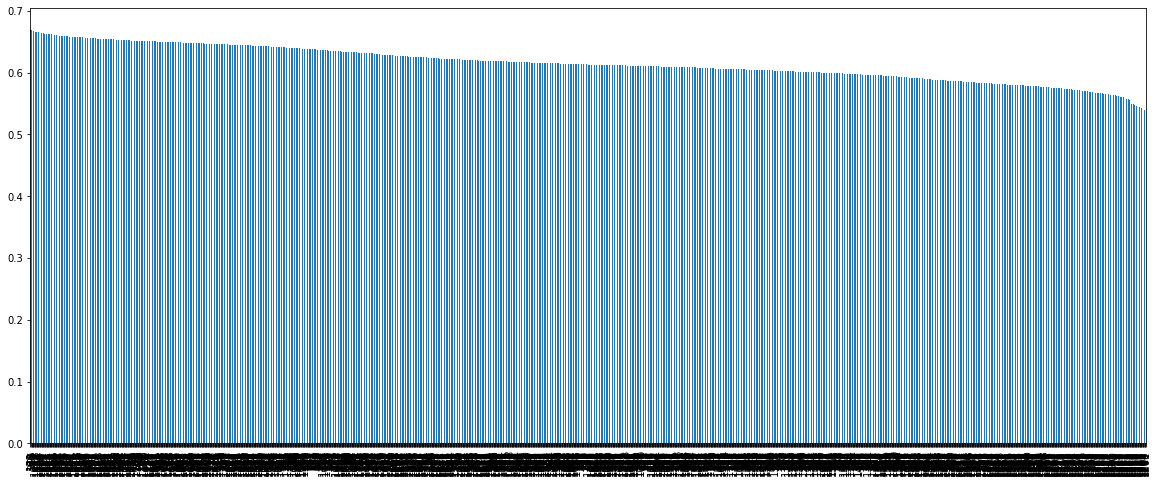

In [ ]:
#let's plot the ordered mutual_info values per feature
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [ ]:
from sklearn.feature_selection import SelectKBest


In [162]:
#Now we Will select the  top 360 important features
sel_five_cols = SelectKBest(mutual_info_classif, k=360)
sel_five_cols.fit(S_train, L_train)
S_train.columns[sel_five_cols.get_support()]

Int64Index([  31,   48,   53,   57,   58,   59,   60,   61,   63,   64,
            ...
            1183, 1184, 1185, 1186, 1188, 1189, 1190, 1193, 1194, 1195],
           dtype='int64', length=360)

In [ ]:
IG_S_train=S_train[[31,   48,   53,   57,   58,   59,   60,   61,   63,   64,   65,
         66,   67,   68,   69,   70,   71,   72,   78,   80,   81,   82,
         83,   84,   85,   86,   87,   88,   91,   93,   94,   95,   96,
         97,   98,   99,  100,  101,  102,  103,  104,  108,  109,  110,
        116,  117,  118,  119,  120,  121,  122,  123,  125,  126,  129,
        130,  131,  132,  133,  134,  135,  136,  137,  138,  139,  140,
        141,  142,  144,  145,  146,  148,  149,  150,  151,  154,  156,
        157,  158,  159,  160,  161,  162,  163,  164,  165,  166,  167,
        168,  169,  170,  171,  172,  173,  174,  175,  176,  177,  178,
        179,  180,  181,  182,  183,  185,  186,  187,  188,  189,  190,
        191,  192,  193,  194,  195,  196,  197,  198,  199,  200,  201,
        202,  203,  204,  205,  206,  207,  208,  209,  210,  211,  212,
        213,  214,  215,  216,  217,  219,  220,  221,  222,  224,  226,
        227,  228,  229,  230,  231,  232,  234,  237,  239,  240,  241,
        242,  243,  244,  245,  246,  247,  248,  249,  258,  259,  261,
        266,  275,  296,  923,  938,  941,  944,  954,  956,  957,  958,
        959,  960,  961,  962,  964,  965,  968,  969,  970,  976,  980,
        981,  982,  984,  985,  990,  993,  994,  995,  997,  998,  999,
       1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1011, 1012,
       1013, 1015, 1016, 1017, 1019, 1020, 1022, 1023, 1024, 1025, 1026,
       1027, 1028, 1029, 1030, 1031, 1032, 1033, 1034, 1035, 1036, 1037,
       1038, 1039, 1040, 1041, 1042, 1043, 1044, 1045, 1046, 1048, 1049,
       1050, 1051, 1052, 1053, 1054, 1055, 1057, 1058, 1059, 1060, 1061,
       1062, 1064, 1066, 1067, 1068, 1069, 1070, 1071, 1072, 1073, 1074,
       1075, 1076, 1077, 1078, 1080, 1081, 1082, 1083, 1086, 1087, 1088,
       1089, 1090, 1092, 1093, 1094, 1095, 1098, 1099, 1100, 1101, 1102,
       1103, 1104, 1105, 1106, 1107, 1108, 1109, 1111, 1114, 1115, 1116,
       1117, 1118, 1119, 1120, 1121, 1122, 1123, 1124, 1125, 1126, 1128,
       1129, 1130, 1132, 1133, 1134, 1136, 1138, 1139, 1141, 1142, 1143,
       1144, 1145, 1146, 1147, 1148, 1150, 1151, 1152, 1153, 1154, 1155,
       1156, 1157, 1158, 1159, 1160, 1161, 1162, 1165, 1166, 1167, 1170,
       1171, 1172, 1173, 1174, 1176, 1177, 1180, 1181, 1182, 1183, 1184,
       1185, 1186, 1188, 1189, 1190, 1193, 1194, 1195]]

In [ ]:
ss=S_train.columns[sel_five_cols.get_support()].values
ss

array([  31,   48,   53,   57,   58,   59,   60,   61,   63,   64,   65,
         66,   67,   68,   69,   70,   71,   72,   78,   80,   81,   82,
         83,   84,   85,   86,   87,   88,   91,   93,   94,   95,   96,
         97,   98,   99,  100,  101,  102,  103,  104,  108,  109,  110,
        116,  117,  118,  120,  121,  122,  123,  125,  126,  129,  130,
        131,  132,  133,  134,  135,  136,  137,  138,  139,  140,  141,
        142,  144,  145,  146,  148,  149,  150,  151,  154,  156,  157,
        158,  159,  160,  161,  162,  163,  164,  165,  166,  167,  168,
        169,  170,  171,  172,  173,  174,  175,  176,  177,  178,  179,
        180,  181,  182,  183,  185,  186,  187,  188,  189,  190,  191,
        192,  193,  194,  195,  196,  197,  198,  199,  200,  201,  202,
        203,  204,  205,  206,  207,  208,  209,  210,  211,  212,  213,
        214,  215,  216,  217,  219,  220,  221,  222,  224,  226,  227,
        228,  229,  230,  231,  232,  234,  237,  2

In [ ]:
IG_S_test=S_test[[31,   48,   53,   57,   58,   59,   60,   61,   63,   64,   65,
         66,   67,   68,   69,   70,   71,   72,   78,   80,   81,   82,
         83,   84,   85,   86,   87,   88,   91,   93,   94,   95,   96,
         97,   98,   99,  100,  101,  102,  103,  104,  108,  109,  110,
        116,  117,  118,  119,  120,  121,  122,  123,  125,  126,  129,
        130,  131,  132,  133,  134,  135,  136,  137,  138,  139,  140,
        141,  142,  144,  145,  146,  148,  149,  150,  151,  154,  156,
        157,  158,  159,  160,  161,  162,  163,  164,  165,  166,  167,
        168,  169,  170,  171,  172,  173,  174,  175,  176,  177,  178,
        179,  180,  181,  182,  183,  185,  186,  187,  188,  189,  190,
        191,  192,  193,  194,  195,  196,  197,  198,  199,  200,  201,
        202,  203,  204,  205,  206,  207,  208,  209,  210,  211,  212,
        213,  214,  215,  216,  217,  219,  220,  221,  222,  224,  226,
        227,  228,  229,  230,  231,  232,  234,  237,  239,  240,  241,
        242,  243,  244,  245,  246,  247,  248,  249,  258,  259,  261,
        266,  275,  296,  923,  938,  941,  944,  954,  956,  957,  958,
        959,  960,  961,  962,  964,  965,  968,  969,  970,  976,  980,
        981,  982,  984,  985,  990,  993,  994,  995,  997,  998,  999,
       1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1011, 1012,
       1013, 1015, 1016, 1017, 1019, 1020, 1022, 1023, 1024, 1025, 1026,
       1027, 1028, 1029, 1030, 1031, 1032, 1033, 1034, 1035, 1036, 1037,
       1038, 1039, 1040, 1041, 1042, 1043, 1044, 1045, 1046, 1048, 1049,
       1050, 1051, 1052, 1053, 1054, 1055, 1057, 1058, 1059, 1060, 1061,
       1062, 1064, 1066, 1067, 1068, 1069, 1070, 1071, 1072, 1073, 1074,
       1075, 1076, 1077, 1078, 1080, 1081, 1082, 1083, 1086, 1087, 1088,
       1089, 1090, 1092, 1093, 1094, 1095, 1098, 1099, 1100, 1101, 1102,
       1103, 1104, 1105, 1106, 1107, 1108, 1109, 1111, 1114, 1115, 1116,
       1117, 1118, 1119, 1120, 1121, 1122, 1123, 1124, 1125, 1126, 1128,
       1129, 1130, 1132, 1133, 1134, 1136, 1138, 1139, 1141, 1142, 1143,
       1144, 1145, 1146, 1147, 1148, 1150, 1151, 1152, 1153, 1154, 1155,
       1156, 1157, 1158, 1159, 1160, 1161, 1162, 1165, 1166, 1167, 1170,
       1171, 1172, 1173, 1174, 1176, 1177, 1180, 1181, 1182, 1183, 1184,
       1185, 1186, 1188, 1189, 1190, 1193, 1194, 1195]]

# Testing model on IG (360=.708)

In [ ]:
# Classifying HAR samples:

lr_r = RandomForestClassifier(n_estimators=300, max_features='sqrt')
lr_r.fit(IG_S_train,  L_train)
accuracy_r = lr_r.score(IG_S_test, L_test)

In [ ]:
# Showing results:

print('Classification Accuracy: ',accuracy_r)
L_pred=lr_r.predict(IG_S_test)
print('\nConfusion Report: ') 
print(classification_report(L_test, L_pred))

Classification Accuracy:  0.7082730923694779

Confusion Report: 
              precision    recall  f1-score   support

           0       0.66      0.79      0.72       566
           1       0.75      0.77      0.76       562
           2       0.79      0.74      0.77       539
           3       0.67      0.83      0.74       560
           4       0.67      0.96      0.79       653
           5       0.73      0.60      0.66       544
           6       0.72      0.65      0.68       529
           7       0.56      0.80      0.66       400
           8       0.93      0.95      0.94       200
           9       0.98      0.28      0.43       144
          10       0.79      0.27      0.40       302
          11       0.70      0.87      0.78       265
          12       1.00      0.05      0.10        95
          13       0.73      0.58      0.64        78
          14       0.90      0.96      0.93       178
          15       0.62      0.48      0.54       239
          16    

#ML model and compare the performance of the selected feature IG Vs. Original (1800 = 0.806)


In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
def run_randomForest(X_train, X_test, y_train, y_test):
    clf = RandomForestClassifier(n_estimators=400, random_state=0, n_jobs=-1)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print('Accuracy on test set: ')
    print(accuracy_score(y_test, y_pred))

In [ ]:
%%time
run_randomForest(IG_S_train, IG_S_test, L_train, L_test)

Accuracy on test set: 
0.7079518072289157
CPU times: user 3min 43s, sys: 1.1 s, total: 3min 44s
Wall time: 1min 55s


In [ ]:
%%time
run_randomForest(S_train, S_test, L_train, L_test)

Accuracy on test set: 
0.8067469879518072
CPU times: user 8min 42s, sys: 1.27 s, total: 8min 43s
Wall time: 4min 30s


# Feature Grouping and Feature Importance based on tree based classifiers(12 features) =.614


In [ ]:
corrmat

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1760,1761,1762,1763,1764,1765,1766,1767,1768,1769,1770,1771,1772,1773,1774,1775,1776,1777,1778,1779,1780,1781,1782,1783,1784,1785,1786,1787,1788,1789,1790,1791,1792,1793,1794,1795,1796,1797,1798,1799
0,1.000000,1.000000,0.999999,0.999998,0.999996,0.999994,0.999992,0.999989,0.999986,0.999983,0.999979,0.999975,0.999970,0.999965,0.999959,0.999953,0.999947,0.999940,0.999933,0.999925,0.999917,0.999909,0.999900,0.999891,0.999881,0.999871,0.999860,0.999849,0.999838,0.999826,0.999814,0.999802,0.999789,0.999775,0.999761,0.999747,0.999732,0.999717,0.999701,0.999685,...,-0.432508,-0.432493,-0.432481,-0.432467,-0.432454,-0.432439,-0.432427,-0.432411,-0.432400,-0.432384,-0.432371,-0.432356,-0.432342,-0.432327,-0.432312,-0.432299,-0.432283,-0.432270,-0.432255,-0.432237,-0.432225,-0.432210,-0.432194,-0.432178,-0.432163,-0.432147,-0.432132,-0.432118,-0.432101,-0.432085,-0.432071,-0.432054,-0.432037,-0.432022,-0.432006,-0.431985,-0.431958,-0.431937,-0.431911,-0.431887
1,1.000000,1.000000,1.000000,0.999999,0.999998,0.999996,0.999994,0.999992,0.999989,0.999986,0.999983,0.999979,0.999975,0.999970,0.999965,0.999959,0.999953,0.999947,0.999940,0.999933,0.999925,0.999917,0.999909,0.999900,0.999891,0.999881,0.999871,0.999860,0.999849,0.999838,0.999826,0.999814,0.999801,0.999788,0.999775,0.999761,0.999747,0.999732,0.999717,0.999701,...,-0.432514,-0.432499,-0.432487,-0.432473,-0.432460,-0.432445,-0.432433,-0.432418,-0.432407,-0.432390,-0.432377,-0.432363,-0.432348,-0.432334,-0.432318,-0.432306,-0.432290,-0.432277,-0.432262,-0.432245,-0.432232,-0.432217,-0.432201,-0.432186,-0.432170,-0.432155,-0.432139,-0.432126,-0.432109,-0.432093,-0.432078,-0.432062,-0.432045,-0.432030,-0.432014,-0.431993,-0.431966,-0.431945,-0.431919,-0.431896
2,0.999999,1.000000,1.000000,1.000000,0.999999,0.999998,0.999996,0.999994,0.999992,0.999989,0.999986,0.999983,0.999979,0.999974,0.999970,0.999965,0.999959,0.999953,0.999947,0.999940,0.999933,0.999925,0.999917,0.999909,0.999900,0.999890,0.999881,0.999871,0.999860,0.999849,0.999838,0.999826,0.999814,0.999801,0.999788,0.999775,0.999761,0.999746,0.999731,0.999716,...,-0.432530,-0.432515,-0.432503,-0.432489,-0.432477,-0.432462,-0.432450,-0.432434,-0.432423,-0.432407,-0.432394,-0.432379,-0.432365,-0.432351,-0.432335,-0.432323,-0.432307,-0.432294,-0.432279,-0.432262,-0.432249,-0.432234,-0.432218,-0.432203,-0.432188,-0.432172,-0.432157,-0.432143,-0.432127,-0.432111,-0.432096,-0.432080,-0.432063,-0.432048,-0.432032,-0.432011,-0.431984,-0.431963,-0.431937,-0.431914
3,0.999998,0.999999,1.000000,1.000000,1.000000,0.999999,0.999998,0.999996,0.999994,0.999992,0.999989,0.999986,0.999983,0.999979,0.999974,0.999970,0.999965,0.999959,0.999953,0.999947,0.999940,0.999933,0.999925,0.999917,0.999909,0.999900,0.999890,0.999881,0.999871,0.999860,0.999849,0.999838,0.999826,0.999814,0.999801,0.999788,0.999774,0.999760,0.999746,0.999731,...,-0.432541,-0.432526,-0.432514,-0.432500,-0.432487,-0.432473,-0.432461,-0.432445,-0.432434,-0.432418,-0.432405,-0.432391,-0.432376,-0.432362,-0.432347,-0.432334,-0.432318,-0.432305,-0.432291,-0.432273,-0.432261,-0.432246,-0.432230,-0.432215,-0.432200,-0.432184,-0.432169,-0.432155,-0.432139,-0.432123,-0.432108,-0.432092,-0.432075,-0.432061,-0.432044,-0.432023,-0.431997,-0.431976,-0.431950,-0.431927
4,0.999996,0.999998,0.999999,1.000000,1.000000,1.000000,0.999999,0.999998,0.999996,0.999994,0.999992,0.999989,0.999986,0.999983,0.999979,0.999974,0.999970,0.999965,0.999959,0.999953,0.999947,0.999940,0.999933,0.999925,0.999917,0.999908,0.999900,0.999890,0.999881,0.999870,0.999860,0.999849,0.999837,0.999826,0.999813,0.999801,0.999788,0.999774,0.999760,0.999746,...,-0.432544,-0.432529,-0.432517,-0.432504,-0.432491,-0.432476,-0.432464,-0.432449,-0.432438,-0.432422,-0.432409,-0.432394,-0.432380,-0.432366,-0.432351,-0.432338,-0.432322,-0.432309,-0.432295,-0.432278,-0.432266,-0.432250,-0.432235,-0.432219,-0.432204,-0.43

In [ ]:
corrdata = corrmat.abs().stack()
corrdata

0     0       1.000000
      1       1.000000
      2       0.999999
      3       0.999998
      4       0.999996
                ...   
1799  1795    0.999998
      1796    0.999999
      1797    0.999999
      1798    1.000000
      1799    1.000000
Length: 3240000, dtype: float64

In [ ]:
corrdata = corrdata.sort_values(ascending=False)
corrdata

0     0       1.000000e+00
675   675     1.000000e+00
593   593     1.000000e+00
594   594     1.000000e+00
595   595     1.000000e+00
                  ...     
1204  530     4.501657e-07
1234  568     2.712521e-07
568   1234    2.712521e-07
1209  537     2.109868e-07
537   1209    2.109868e-07
Length: 3240000, dtype: float64

In [ ]:
corrdata = corrdata[corrdata>0.85]
corrdata = corrdata[corrdata<1]
corrdata

1659  1660    1.000000
1660  1659    1.000000
1675  1676    1.000000
1676  1675    1.000000
1650  1651    1.000000
                ...   
428   975     0.850001
1037  486     0.850000
486   1037    0.850000
378   920     0.850000
920   378     0.850000
Length: 600430, dtype: float64

In [ ]:
corrdata = pd.DataFrame(corrdata).reset_index()

In [ ]:

corrdata.columns = ['features1', 'features2','features3', 'corr_value']
corrdata

,features1,features2,features3,corr_value
0,0,1659,1660,1.000000
1,1,1660,1659,1.000000
2,2,1675,1676,1.000000
3,3,1676,1675,1.000000
4,4,1650,1651,1.000000
...,...,...,...,...
600425,600425,428,975,0.850001
600426,600426,1037,486,0.850000
600427,600427,486,1037,0.850000
600428,600428,378,920,0.850000


In [ ]:
grouped_feature_list = []
correlated_groups_list = []
for feature in corrdata.features2.unique():
    if feature not in grouped_feature_list:
        correlated_block = corrdata[corrdata.features2 == feature]
        grouped_feature_list = grouped_feature_list + list(correlated_block.features3.unique()) + [feature]
        correlated_groups_list.append(correlated_block)

In [ ]:
len(correlated_groups_list)

6

In [ ]:
important_features = []
for group in correlated_groups_list:
    features = list(group.features2.unique()) + list(group.features3.unique())
    rf = RandomForestClassifier(n_estimators=100, random_state=0)
    rf.fit(S_train[features], L_train)
    
    importance = pd.concat([pd.Series(features), pd.Series(rf.feature_importances_)], axis = 1)
    importance.columns = ['features', 'importance']
    importance.sort_values(by = 'importance', ascending = False, inplace = True)
    feat = importance.iloc[0]
    important_features.append(feat)

In [ ]:
important_features

[features      1759.000000
 importance       0.005455
 Name: 197, dtype: float64, features      1413.000000
 importance       0.005215
 Name: 86, dtype: float64, features      1181.000000
 importance       0.005025
 Name: 22, dtype: float64, features      173.000000
 importance      0.006607
 Name: 173, dtype: float64, features      990.00000
 importance      0.00329
 Name: 342, dtype: float64, features      655.000000
 importance      0.006254
 Name: 55, dtype: float64]

In [ ]:
important_features = pd.DataFrame(important_features)

In [ ]:
important_features.reset_index(inplace=True, drop = True)

In [ ]:
important_features

,features,importance
0,1759.0,0.005455
1,1413.0,0.005215
2,1181.0,0.005025
3,173.0,0.006607
4,990.0,0.003290
5,655.0,0.006254


In [ ]:
features_to_consider = set(important_features['features'])

In [ ]:
features_to_discard = set(corr_features) - set(features_to_consider)

In [ ]:
features_to_discard = list(features_to_discard)

In [ ]:
X_train_grouped_uncorr = S_train.drop(labels = features_to_discard, axis = 1)
X_train_grouped_uncorr.shape

(14525, 12)

In [163]:
X_test_grouped_uncorr

,0,173,300,600,655,900,990,1181,1200,1413,1500,1759
7508,3.570800,1.096700,-0.713320,0.510580,1.243200,-0.507350,0.624150,0.643240,0.669160,-0.230270,-0.360920,-1.143800
8401,5.439100,-3.777300,0.844250,-2.254600,-1.432900,2.146200,-1.418100,0.482730,-0.136000,-0.979150,-3.440200,1.298300
1239,-0.019886,-0.059665,0.013680,0.039101,0.047911,0.007087,-0.000699,-0.002124,0.003275,-0.020167,-0.000059,0.004983
7883,7.742500,1.425300,3.976000,2.117300,0.578720,-0.558400,1.554600,1.275400,2.346700,-0.005724,0.021655,-0.285610
15990,0.018806,0.011480,-0.006352,-0.048739,-0.035163,0.021188,-0.005020,0.029107,0.015409,0.001658,-0.004511,-0.008461
...,...,...,...,...,...,...,...,...,...,...,...,...
1225,-0.026359,-0.051461,-0.032583,0.020966,0.019486,-0.006428,0.002574,-0.022990,0.001491,0.003541,-0.003442,-0.032105
8198,-3.219500,-4.800600,4.991900,-4.524100,-3.604900,-0.347800,-0.104040,1.089100,0.201090,-0.491390,0.369650,0.646950
14271,0.108780,-0.085036,-0.356840,-0.783240,0.729910,0.216360,0.151000,0.127560,-0.225020,-0.594980,-0.043480,-0.085909
12432,0.258440,0.427990,-0.036846,1.524000,-1.182600,0.350520,-0.031845,0.672300,-0.047291,0.337910,-0.101880,0.090427


In [ ]:
X_test_grouped_uncorr = S_test.drop(labels=features_to_discard, axis = 1)
X_test_grouped_uncorr.shape

(6225, 12)

In [ ]:
%%time
run_randomForest(X_train_grouped_uncorr, X_test_grouped_uncorr, y_train, y_test)

Accuracy on test set: 
0.6144578313253012
CPU times: user 41.7 s, sys: 3.53 s, total: 45.3 s
Wall time: 25.2 s


# mutual info percentile (180 features) =0.673

In [ ]:
from sklearn.feature_selection import VarianceThreshold, mutual_info_classif, mutual_info_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile

In [ ]:
sel = SelectPercentile(mutual_info_classif, percentile=10).fit(S_train, L_train)
S_train.columns[sel.get_support()]

Int64Index([  53,   57,   59,   60,   61,   64,   67,   70,   71,   72,
            ...
            1141, 1144, 1145, 1157, 1160, 1165, 1167, 1171, 1176, 1183],
           dtype='int64', length=180)

In [ ]:
len(S_train.columns[sel.get_support()])

180

In [ ]:
X_train_mi = sel.transform(S_train)
X_test_mi = sel.transform(S_test)

In [ ]:
X_train_mi.shape

(14525, 180)

In [ ]:
def run_randomForest(X_train, X_test, y_train, y_test):
    clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print('Accuracy on test set: ')
    print(accuracy_score(y_test, y_pred))

In [ ]:
%%time
run_randomForest(X_train_mi, X_test_mi, L_train, L_test)

Accuracy on test set: 
0.6730923694779116
CPU times: user 40.9 s, sys: 1.97 s, total: 42.9 s
Wall time: 24.8 s


# Mutual Information Gain in Regression (9 =0.486) (100=0.64) (600=0.7206)

In [ ]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
mi = mutual_info_regression(S_train, L_train)
mi = pd.Series(mi)
mi.index = S_train.columns
mi.sort_values(ascending=False, inplace = True)

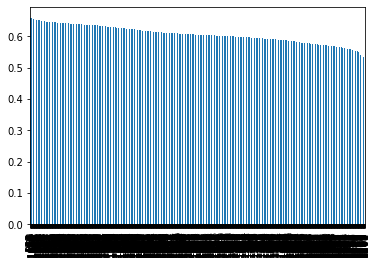

In [ ]:
mi.plot.bar()

In [ ]:
S_train.columns

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            1790, 1791, 1792, 1793, 1794, 1795, 1796, 1797, 1798, 1799],
           dtype='int64', length=1800)

In [169]:
sel = SelectKBest(mutual_info_regression, k = 600).fit(S_train, L_train)
S_train.columns[sel.get_support()]

Int64Index([  20,   24,   29,   30,   31,   32,   33,   35,   37,   38,
            ...
            1718, 1719, 1720, 1727, 1733, 1748, 1778, 1785, 1788, 1789],
           dtype='int64', length=600)

In [170]:
X_train_9 = sel.transform(S_train)
X_train_9.shape

(14525, 600)

In [171]:
X_test_9 = sel.transform(S_test)

In [172]:
%%time
run_randomForest(X_train_9, X_test_9, L_train, L_test)

Accuracy on test set: 
0.7206425702811246
CPU times: user 1min 15s, sys: 309 ms, total: 1min 15s
Wall time: 39.3 s


# Step forward - Step backward (error)

In [156]:
!pip install mlxtend
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector as SFS